# Straka Bubble Test 🫧

Welcome to the first $\texttt{PADDLE}$ tutorial! Here, we will demonstrate how to initialize and run the code for dynamical simulations, and processing outputs, by showcasing the Straka bubble test. 
 
The Straka bubble test, developed by [Straka et al. (1993)](https://onlinelibrary.wiley.com/doi/abs/10.1002/fld.1650170103), is a standard benchmark test of non-hydrostatic numerical models. 

The test involves simulating a dense, sinking bubble that collides with a bottom, rigid, boundary layer. The full execution of the code follows the sinking of the bubble, and the resulting density currents/perturbations at the boundary layer. 

The sinking bubble is a perfect introduction for how a non-hydrostatic code, like $\texttt{PADDLE}$, differs from codes that assume hydrostatic equilibrium. In particular, hydrostatic equilibrium assumes that the vertical pressure gradient balances gravity.

In the sinking bubble case, there is a density perturbation that causes it to break this equilibrium, since it must accelerate and sink. Processes similar to the sinking bubble case occur in planetary atmospheres, where parcels of air can differ in density or temperature from their surrounding environment, causing non-hydrostatic convective motions. 

This test was first applied to $\texttt{SNAP}$ (Simulating Nonhydrostatic Atmospheres on Planets, the underlying numerical simulation solver of $\texttt{PADDLE}$) in [Li et al. (2019)](https://iopscience.iop.org/article/10.3847/1538-4365/aafdaa). It was also applied to $\texttt{CANOE}$ (Comprehensive Atmosphere N' Ocean Engine, another underlying code to $\texttt{PADDLE}$), see this [blog post](https://public.websites.umich.edu/~jihenghu/space/research/canoe-athena/canoe-example-straka/index.html).

Let's get started by setting up the Straka problem!

<img src="../../images/2d.straka-theta.png">

<div class="alert alert-block alert-success">

## $\texttt{PADDLE}$ Straka - Run In Terminal 

If you don't want to be bogged down by all the details of the tutorial, here is how to run the entire bubble test in a terminal.

In order to run in the terminal: 


1. Open a terminal and activate your paddle conda environment
2. cd into the directory storing the straka.yaml and straka.py (/example_py_scripts)
3. Run the following code in terminal (2 = number of cores)
    ```
    pd-run 2 python straka.py
    ```
4. Once finished, you'll notice a bundle of `.nc` files with `.out1` in them. This code combines them into a `main.nc` 
    ```
    pd-combine 1 -o main
    ```
5. Then to view
    ```
    ncview straka-main.nc
    ```

See the `distribute.md' for how to set up the number of cores the code is run on.

</div>

# Problem Set-Up

In simple terms, the Straka problem involves: 

1. **A background 2-dimensional atmosphere that has a constant potential temperature of 300K referenced at 1 bar.**

2. **A parcel of gas (a bubble) is defined, vertically displaced, with a maximum temperature difference of -15K.** 

<div class="alert alert-warning">

$\textbf{Potential Temperature}$ ($\theta$)  is the temperature a parcel of unsaturated (no moisture, also known as 'dry') air in the atmosphere would have if it is moved adiabatically (not losing or gaining any heat to the environment) to a specific pressure. 

In this case, it means that a parcel of dry air in the background atmosphere would have a temperature of 300K at 1 bar (which is, coincidentally, the temperature and surface pressure of Earth). It is defined for an ideal gas as 

$$\theta = T(\frac{P_0}{P})^{\frac{R}{c_p}}$$

where $T$ is the temperature of the parcel, $P$ is the pressure of the parcel, $P_0$ is the reference pressure (here, 1 bar), $R$ is the specific gas constant of air, and $c_p$ is the specific heat capacity at constant pressure. In our background atmosphere, if a parcel of dry air is brought adiabatically from a pressure $P$ and temperature $T$ to 1 bar, it would be 300K. 

Potential Temperature is a hugely important quantity in dynamical simulations, since it is a conserved quantity for dry adiabatic processes and is useful in determining the atmospheric stability of a parcel of gas.

In particular, if the potential temperature increases with height the atmoshere is stable (vertical motions of parcels are supressed, i.e., stably stratified) and if it decreases with height the atmosphere is unstable and prone to convection (perturbed air parcels with either rise or sink).

</div>

Lets see how to actually set this problem up in $\texttt{PADDLE}$. 

# $\texttt{PADDLE}$ Problem Generation 

In order to use $\texttt{PADDLE}$, one has to set up the problem (the physics behind the problem, either in a `.ipynb` or `.py` file) and a configuration file (`.yaml` file). 

For initialization, users can either directly edit the `.yaml` file provided in the example folder and run `.py` scripts in a terminal (see `/example_py_scripts/straka.yaml` and `straka.py`) or can define variables and run code in a jupyter notebook. 

For this demonstration, we will walk through the entire contents of the `straka.yaml` and `straka.py` files and run code in this notebook.

<div class="alert alert-block alert-success">

## $\texttt{PADDLE}$ Straka Initilization (Generation of .yaml file)

A `.yaml` file is, in essence, a dictionary of configurations. Here, we will generate the dictionary from scratch and convert it into a `.yaml` file at the end. 

We suggest having the `straka.yaml` file (located in the `/example_py_scripts` folder) pulled up while following the tutorial below. 

</div>

<div class="alert alert-info">

### Define Simulation Domain Geometry ($\texttt{geometry}$)

The first dictionary entry in the `.yaml` file, $\texttt{geometry}$, defines the geometry of the simulation domain. 

The first thing to define is the domain (size and resolution) of the simulation. In this case, its the spatial dimension and resolution of the background atmosphere.  

For our background atmosphere, lets define a 2D atmosphere that is 25.6 kilometers (15 miles) wide and 6.4 km (4 miles) high. 
In PADDLE, the default unit system is SI. 

</div>

In [1]:
# Here we define spatial dimensions 
# Each has a min and max value, defining the cartesian box

# Initialize a cartesian geometry (a box, or a cube)
geometry_type = 'cartesian'

# Spatial Dimensions ('bounds')

# x1 = Height (often denoted with 'z')
x1min = 0
x1max = 6.4e3 # in meters

# x2 = Width (often denoted with 'x')
x2min = 0
x2max = 25.6e3 # in meters

# x3 = Depth (often denoted with 'y')
# While our atmosphere is 2D, we still need to define the depth dimension. 
# Be defining our resolutions, we will ensure the geometry is 2D instead of 3D
# The depth value here is arbritrary
x3min = 0
x3max = 25.6e3

# Spatial Resolutions ('cells')
# Here, we will define the identical vertical and horizontal resolutions

# nx1 = Number of Cells in Height Dimension
nx1 = 64 # 1 cell per 0.1 km 

# nx2 = Number of Cells in Width Dimension 
nx2 = 256 # 1 cell per 0.1 km 

# nx3 = Number of Cells in Depth Dimension 
# Here we want a 2D simulation, so we set this to 1 
nx3 =1 # 1 to reduce simulation to 2D

# nghost = Number of ghost zones
# The ghost zones are additional cells that pad the interior simulation domain 
# I.e. if a simulation is 40x40 it would be 46x46 due to 3 additional cells on each side 
# A good default number here is 3
nghost = 3

Now we actually create the dictionary entry for geometry from the variables above, so we can generate the `.yaml` file from a dictionary at the end of this section.

In [2]:
geometry_dict = {'type': geometry_type,
                 'bounds': {'x1min': x1min, 'x1max': x1max,
                            'x2min': x2min, 'x2max': x2max, 
                            'x3min': x3min, 'x3max': x3max},
                 'cells':  {'nx1': nx1, 'nx2': nx2, 'nx3': nx3, 'nghost': nghost}}

<div class="alert alert-info">

### Define Dynamics ($\texttt{dynamics}$)

The second dictionary entry, $\texttt{dynamics}$, defines the dynamical properties of the simulation. 

In this context, $\texttt{dynamics}$ means properties like the equation of state of the atmosphere, as well as defining the algorithms that are utilized to solve the hydrodynamics of the simulation. 

The $\texttt{dynamics}$ dictionary entry is composed of multiple sub-dictionaries, defined below.

</div>

#### Dynamics sub-dictionary: Equation-of-State Properties 

For our straka bubble case, we will assume the entire atmopshere is an ideal gas. Ideal gases follow the ideal gas law, and all of their state variables (pressure, temperature, volume, internal energy, etc) can be defined entirely by two variables: 

1. The adiabatic index $\gamma$
2. Molecular weight $M$

In future tutorials, we will explore other equation-of-states included in $\texttt{PADDLE}$. 

In [3]:
# Equation of State (EOS) Properties

# We first must set up the equation-of-state of the simulation gas. 
# The equation of state is a thermodynamic equation that relates state variables 
# such as pressure, temperature, volume, and internal energy. 

# Here we use the ideal gas law equation-of-state, which reads as:
# P = rho R T
# where P is pressure; rho is density; R is the specific gas constant; T is temperature
# We will discuss other equations of state in other tutorials
eos_type = 'ideal-gas'

# For ideal gases, you only need two variables, the adiabatic index and molecular weight 

# gammad is the adiabatic index
# It is equal to c_p/c_v = C_p/C_v (heat capacity const p/heat capacity const v)
# (note that lowercase c = specific heat capacity [depends on mass], uppercase C = heat capacity)
# The adiabatic index 1.66 for monoatomic gasses (He, Ar) and 1.4 for diatomic gasses (N, O, Air)
gammad = 1.4 

# molecular weight (kg/mol)
# This is the molecular wieight of Earth's atmosphere 
weight = 29.3e-3 # in kg/mol

# Make Sub-Dictionary 
equation_of_state_dict = {'type': eos_type, 'gammad': gammad, 'weight':weight}

#### Dynamics sub-dictionaries: Vertical Projection, Reconstruct, and Riemann Solver Properties 

For this initial tutorial, the following sub-dictionaries of $\texttt{dynamics}$ (which determine different algorithms that are used in the simulation, and therefore numerical stability) can be taken as-is, though we will provide short introductions to the following: 

The $\texttt{vertical-projection}$ defines a numerical method that is used in non-hydrostatic codes. In short, the numerical method subtracts an hydrostatically balanced atmosphere and let non-hydrostatic pressure to be the force that drives air flow. Default option is to use temperature as the variable for calculating a hydrostatically balanced atmosphere.

The $\texttt{reconstruct}$ properties define the algorithm to compute hydrodynamic variables at cell boundaries in the simulation from properties like cell averages. Here we use the [WENO5](https://en.wikipedia.org/wiki/WENO_methods) (fifth-order accurate weighted essentially nonoscillation) algorithm, which is generally stable for a variety of applications.

Finelly we have the $\texttt{riemann-solver}$, which computers fluxes given hydrodynamic variables at cell boundaries. There are two main options: HLLC (Harten-Lax-van Leer-Contact) and LMARS (Low Mach number Approximate Riemann Solver). HLLC is generally more stable but LMARS is faster.

A few extra configuration options, such a *pressure_margin*, *scale*, *shock* are fine-tune parameters for each algorithm.

In [4]:
# Vertical Projection Properties 

# Vertical projection type 
vertical_projection_type = 'temperature'

pressure_margin = 1e-6

# Make Sub-Dictionary 
vertical_projection_dict = {'type': vertical_projection_type,
                            'pressure-margin': pressure_margin
                            }


In [5]:
# Reconstruct Properties 

# Uses the weno5 alogorithm 

# Vertical Reconstruction 
vertical_reconstruct_type = 'weno5'
vertical_reconstruct_scale = False
vertical_reconstruct_shock = False

# Horizontal Reconstruction 
horizontal_reconstruct_type = 'weno5'
horizontal_reconstruct_scale = False
horizontal_reconstruct_shock = False

# Make Sub-Dictionary 
reconstruct_dict = {'vertical'  : {'type' : vertical_reconstruct_type,
                                   'scale': vertical_reconstruct_scale,
                                   'shock': vertical_reconstruct_shock},
                    'horizontal': {'type' : horizontal_reconstruct_type,
                                   'scale': horizontal_reconstruct_scale,
                                   'shock': horizontal_reconstruct_shock}}

In [6]:
# Riemann Solver 

# LMARS solver (Low Mach number Approximate Riemann Solver)
# was developed to simulate low-speed flows that are more typical for atmospheric simulations
riemann_type = 'lmars'

# Make Sub-Dictionary 
riemann_solver_dict = {'type': riemann_type}

Now we create the dictionary object for the future .yaml file

In [7]:
# Combine the dictionaries above into a larger dynamics dictionary 

dynamics_dict = {'equation-of-state': equation_of_state_dict,
                 'vertical-projection': vertical_projection_dict,
                 'reconstruct': reconstruct_dict,
                 'riemann-solver': riemann_solver_dict}

<div class="alert alert-info">

### Define Boundary Conditions ($\texttt{boundary-condition}$)

The third dictionary entry, $\texttt{boundary-condition}$, defines how waves interact with the boundaries of the simulation domain. 

In particular, there are three main kinds of boundary conditions we can define for each wall of the simulation domain: 

1. Reflecting : This is a solid wall boundary that waves cannot cross. 

2. Periodic : This is a wrapping boundary. I.e., if the right and left walls of the box domain are periodic, waves that hit the right hand side of the domain will appear on the left hand side. That means the simulation domain will be essentially a cylinder, instead of a box. 

3. Outflow: Waves leave the simulation domain forever

The main sub-dictionary we will define here is the $\texttt{external}$ boundary coniditions. There also exists $\texttt{internal}$ boundary coniditions, which defines how waves interact with boundaries inside the simulation domain (like topography), which we will explore in future tutorials simulating rocky planet atmospheres. 

</div>

In [8]:
# External Properties 

# x1 (height) inner and outer properties 
x1_inner = 'reflecting' # Bottom Wall
x1_outer = 'reflecting' # Top Wall

# x2 (width) inner and outer properties 
x2_inner = 'reflecting' # Left Wall
x2_outer = 'reflecting' # Right Wall

# x3 (depth) inner and outer properties 
x3_inner = 'reflecting' # Towards us Wall
x3_outer = 'reflecting' # Away from us Wall


Now we create the dictionary object for the future .yaml file

In [9]:
boundary_condition_dict = {'external': {'x1-inner': x1_inner,
                                         'x1-outer': x1_outer,
                                         'x2-inner': x2_inner,
                                         'x2-outer': x2_outer,
                                         'x3-inner': x3_inner,
                                         'x3-outer': x3_outer}}

<div class="alert alert-info">

### Define Integration Properties ($\texttt{integration}$)

The fourth dictionary entry, $\texttt{integration}$, determines how time-stepping is solved and handled in the simulation. In particular, it also sets how long a simulation is run for. 

For this tutorial, there is no need to change the interation-specific parameters below, though we will provide an explanation of each here: 

$\texttt{integration-type}$ is a strong-stability preserving third-order Runge-Kutta method ('rk3') (for mathematical details, see [link](https://gkeyll.readthedocs.io/en/latest/dev/ssp-rk.html)). This is the default integration type, and there are not too many reasons to change this. 

$\texttt{cfl}$ is the [Courant-Friedrich-Lewy](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition) number which determines the stability of the time-stepping scheme. It is the the ratio of how far a wave/particle can travel in a single time step vs the local cell size. You want this number to be less than 1, where a cfl larger than 1 means information travels more than one cell in a time step, which is not stable.

$\texttt{implicit-scheme}$ determines which Vertical-Implicit correction (VIC) scheme is used. While not important for the straka case where the vertical and horizontal resolutions are the same, usually atmospheric simulations have a large aspect ratio between horizontal and vertical directions that causes the integration time step to be limited by vertical motions. The first implementation of VIC in $\texttt{SNAP}$ can be found in [Ge et al. (2020)](https://iopscience.iop.org/article/10.3847/1538-4357/ab9ec7/pdf). In future tutorials, we will explore different options here (0 = everything is explicit, 1 = simplified vertical implicit for cartesian cases, and 9 = full vertical implicit for cubed-sphere simulations).

</div>

In [10]:
# Integration properties 

# Integration type is a third-order Runge-Kutta method
integration_type = 'rk3'

# cfl = stability condition (Courant-Friedrich-Lewy number)
cfl = 0.9

# implicit_scheme 
# This is tied to the idea of Vertical-Implicit correction schemes
# 0 = everything explicit 
implicit_scheme = 0

Here we define properties that determine how long a simulation runs and how often diganostic information is printed out. 

There are two important distinctions to be made: 

1. $\texttt{cycles}$: A cycle is an integration step, where the simulation time that has elapsed (*dt*) is determined in part by the cfl number above. 

2. $\texttt{time}$: Time here is the number of seconds that have elapsed in the simulation, not amount of time that has elapsed in real life. 

In [11]:
# nlim 
# Number of cycles to run model 
# -1 = run until time limit
nlim = -1 

# How long we want the simulation to run before it terminates
# Here, we set it at 900 seconds
tlim = 900

# ncycle_out 
# frequency of printing out diagnostic information to terminal 
# cycle = integration step
ncycle_out = 10

Now we create the dictionary object for the future .yaml file

In [12]:
integration_dict = {'type': integration_type,
                    'cfl': cfl,
                    'implicit-scheme': implicit_scheme,
                    'nlim': nlim,
                    'tlim': tlim,
                    'ncycle_out':10}

<div class="alert alert-info">

### Define Forcing ($\texttt{forcing}$ )

The fifth dictionary entry, $\texttt{forcing}$, defines what deviates the simulation from its initial equilibrium state. In general, all simulations will include constant (with height) gravity. We will explore other forcings in future tutorials. 

</div>

In [13]:
# Forcing properties 
# Here, we only have the 'const-gravity' sub-dictionary 

# Gravity in the x1 (height) direction
# A negative sign means that gravity points downward
gravity_1 = -9.8 # in m/s^2

Now we create the dictionary object for the future `.yaml` file

In [14]:
forcing_dict = {'const-gravity': {'grav1': gravity_1}}

<div class="alert alert-info">

### Define Initial Problem Conditions

Now we have finished all configurations and are ready to set up the actual properties of the bubble in the simulation, and the atmosphere surrounding it (i.e., define 'problem variables' of the simulation). 

In order to do this, we have to get a bit creative and find a mathematical way to define the bubble's initial coniditions. 

The bubble itself is defined by its spatial dimensions and temperature distribution. 

</div>

#### Bubble's spatial intialization

Here, we define an elliptical-shaped bubble whose center is at the coordinate (0 km, 3 km) (where will take 0 is the 'x'/width coordinate, and 3 is the 'z'/height coordinate). 

In $\texttt{PADDLE}$, height is the first dimension defined in the $\texttt{geometry}$ section above (x1) while width is the second dimension (x2). 

For its actual size, lets define the bubble be to extend 4 km right and left of the center, and 2 km up and down of the center.

By definition, the bubble will exist wherever the elliptical distance $L$ is $<1$, where 

$L = ((\frac{x-x_c}{x_r})^2+(\frac{z-z_c}{z_r})^2)^{1/2}$

where *x_c* and *z_c* are the center coordinate of the bubble, and *x_r* and *z_r* are the maximum left/right up/down distance from the bubble's center.

Lets plot what this looks like in practice.

Text(0, 0.5, 'Simulation Vertical Extent (km, x1, z)')

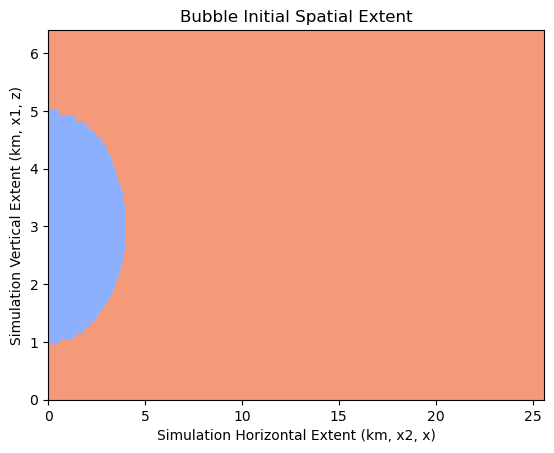

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Center of the bubble is at 0, 3 km
zc = 3e3 # height of center, in meters
xc = 0   # left/right of center, in meters

# Maximum distance up/down,left/right,  from center of bubble 
zr = 2e3 # up/down from center, in meters
xr = 4e3 # left/right from center, in meters

# Lets plot the bubble's spatial extent 

# Simulation domain as defined in Domain Geometry cell above
# Note that x1 (z) in that cell is height 
# and that x2  (x) is the width 
z_array = np.linspace(x1min, x1max, nx1)
x_array = np.linspace(x2min, x2max, nx2)

# Create meshgrid in order to plot 
Z, X = np.meshgrid(z_array, x_array)

# Elliptical distance 
L = ((((X-xc)/xr)**2) + (((Z-zc)/zr)**2))**0.5

# Add the mask L < 1 (which defines the spatial extent of the bubble)
# Divide X and Z by 1000 to get km instead of m 
plt.contourf(X/1000,Z/1000, L < 1, cmap = 'coolwarm_r')
plt.title('Bubble Initial Spatial Extent')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (km, x1, z)')

#### Bubble's temperature anomaly intialization

We will then define some sort of temperature distribution so that the maximum temperature difference will be -15K of the surrounding atmosphere. The following definition ensures theres a sort of gradient of temperature anomaly: 

$\Delta T = -15K \frac{cos(\pi L) + 1}{2} \; ; \; L < 1$

The temperature difference between the bubble and its surrounding atmosphere, $\Delta T$, is known as the temperature anomaly. 

Lets plot what this looks like: 

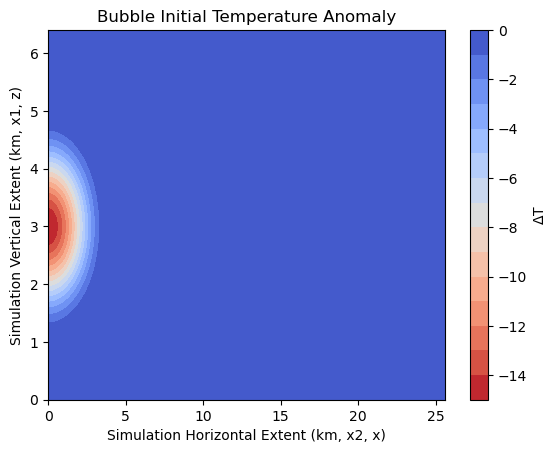

In [16]:
# Maximum temperature difference from surrounding atmosphere
dT = -15 # in Kelvin 

# Temperature anomaly 
# Where L<1 (within bounds of bubble) compute delta_T, otherwise, delta_T = 0
delta_T = np.where(L < 1, dT*((np.cos(np.pi*L) + 1)/2), 0)

# Plot with delta_T as colormap 
plt.contourf(X/1000,Z/1000, delta_T, cmap = 'coolwarm_r', levels = np.linspace(-15,0,16))
plt.title(r'Bubble Initial Temperature Anomaly')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (km, x1, z)')
plt.colorbar(label = r'$\Delta$T')

#### Deriving initial temperature, pressure, and density of simulation domain

Since we defined the background atmosphere as an ideal gas, the simulation as adiabatic, and we know a specific pressure-temperature point (1 bar = 300K), we can derive the full initial condition of the atmosphere (for more complex atmospheres, $\texttt{PADDLE}$ can compute initial conditions, which we will explore in future tutorials)

The dry adiabatic lapse rate (i.e., how temperature changes with altitude) for an ideal gas is 

$\frac{dT}{dz} = -\frac{g}{c_p}$ 

where the units are

$\frac{K}{m} = \frac{m/s^2}{J/K\cdot kg} = \frac{m/s^2}{(kg \cdot m^2/s^2)/K\cdot kg}$

For an ideal gas under adiabatic conditions, we can get the specific heat capacity (constant pressure) via 

$c_p = \frac{\gamma R}{\gamma -1} = \frac{\gamma}{\gamma -1}\frac{8.314 \; J/mol\cdot K}{M}$

where $\gamma$ is the adiabatic index, $R$ is the specific gas constant (= universal gas constant/molecular weight), and $M$ is the molecular weight defined in the $\texttt{dynamics}$ dictionary

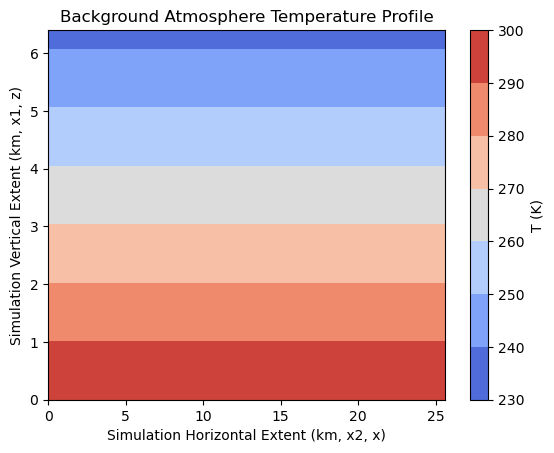

In [17]:
# Specific heat capacity (const pressure) for ideal gas
c_p = (gammad/(gammad-1))*(8.314/weight)

# Dry adiabatic lapse rate for ideal gas
# Note that gravity_1 is already negative 
# So we remove the '-' sign 
dT_dz = gravity_1/c_p # K per m 

# Initial condition 
# Surface temperature is 300K 
Ts = 300

# T = Initial Tempearture + (lapse rate * altitude array)
T_array = 300 + (dT_dz*Z)

# Plot temperature w/ height 
plt.contourf(X/1000,Z/1000, T_array, cmap = 'coolwarm', levels = np.linspace(230,300,8))
plt.title(r'Background Atmosphere Temperature Profile')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (km, x1, z)')
plt.colorbar(label = r'T (K)')

We can now apply the temperature anomaly of the bubble to the atmosphere

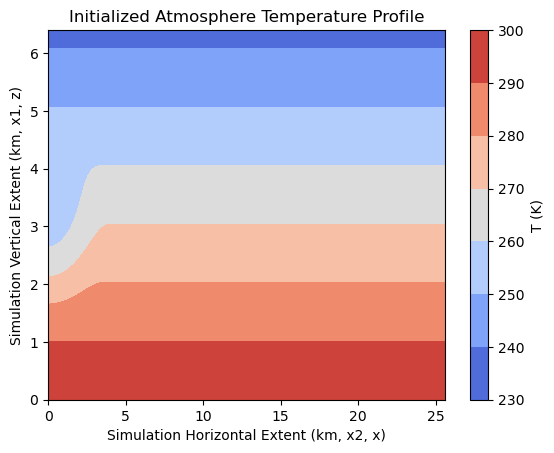

In [18]:
# Temperature array + temperature anomaly array 
plt.contourf(X/1000,Z/1000, T_array + delta_T, cmap = 'coolwarm', levels = np.linspace(230,300,8))
plt.title(r'Initialized Atmosphere Temperature Profile')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (km, x1, z)')
plt.colorbar(label = r'T (K)')

We can also convert altitude to pressure, and get initial density. 

To convert from altitude to pressure:

$P = P_0(1-\frac{h}{T_0}\frac{g}{c_p})^\frac{\gamma}{\gamma -1}$

where h is the altitude, and $P_0$ and $T_0$ are some known P and T, which we take to be the surface temperature (Ts) and pressure (p0). 

In nonhydrostatic simulations, it is natural to take altitude as the vertical coordinate instead of pressure since pressure is a variable controlled by dynamics (instead of from hydrostatic balance).

And finally, the density is given by 

$\rho = \frac{P}{T}\frac{M}{8.314 \; J/mol\cdot K}$

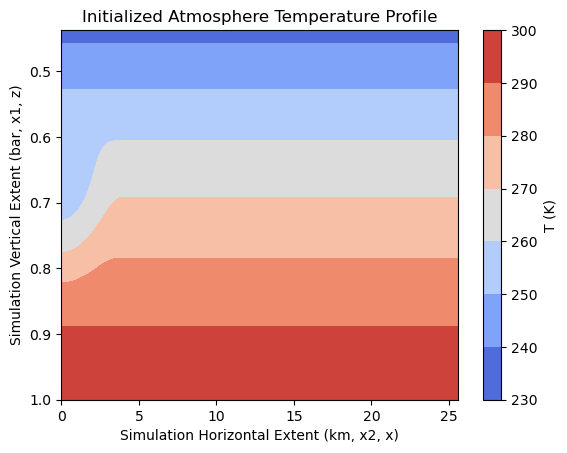

In [19]:
# p0 is the surface pressure
# 1 bar = 1e5 pascals 
p0 = 1e5

# Note that gravity_1 is negative so we flip the sign here 
P = p0*(1-((Z/Ts)*(-gravity_1/c_p)))**(gammad/(gammad-1))

# Plot pressure in bars on y-axis
plt.contourf(X/1000,P/1e5, T_array + delta_T, cmap = 'coolwarm',levels = np.linspace(230,300,8))
plt.gca().invert_yaxis()
plt.title(r'Initialized Atmosphere Temperature Profile')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (bar, x1, z)')
plt.colorbar(label = r'T (K)')

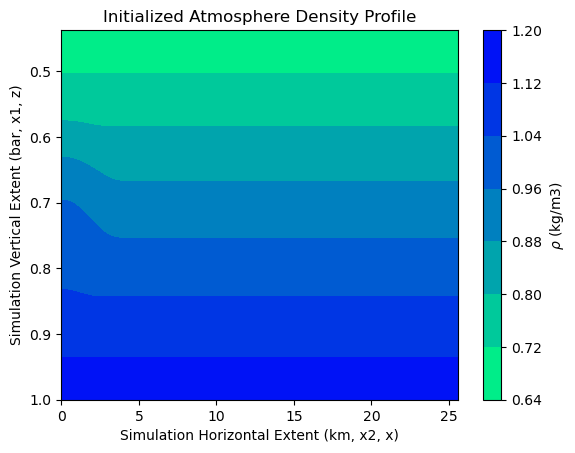

In [20]:
# Solve for air density
density = (P/(T_array+delta_T))*(weight/8.314)

# Plot
plt.contourf(X/1000,P/1e5, density, cmap = 'winter_r',)
plt.gca().invert_yaxis()
plt.title(r'Initialized Atmosphere Density Profile')
plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
plt.ylabel('Simulation Vertical Extent (bar, x1, z)')
plt.colorbar(label = r'$\rho$ (kg/m3)')

Great! So we have a good idea how our bubble is set up before we let it drop. 

The actual physics we discussed above will be used to set up the actual python code we use to run the simulation. Here, we set the problem variables that will be used to intialize the spatial and physical properties of the bubble and surrounding atmosphere. 

In [21]:
# Define the problem's free parameters

# p0 is the surface pressure
# 1 bar = 1e5 pascals 
p0 = 1e5 # in pascals

# surface temperature 
Ts = 300 # in K 

# Horizontal coordinate for center of bubble 
xc = 0 # in m 

# Horizontal extent of bubble
xr = 4e3 # in m

# Vertical coordinate for center of bubble
zc = 3e3 # in m

# Vertical extent of bubble
zr = 2e3 # in m

# Maximum temperature anomaly 
dT = -15 

# K is the kinematic viscosity
# This free parameter is only used here in straka in order to benchmark with original paper
# So no need to pay this variable any heed
K = 75

<div class="alert alert-info">

### Define Outputs ($\texttt{outputs}$)

The final dictionary entry, $\texttt{outputs}$, determines what sorts of files are produced by the simulation. This portion is extremely important to define carefully, as it determines how often outputs are produced and what sort of variables are saved for future analysis. 

When you run $\texttt{PADDLE}$ code, two sorts of files will be produced. 

1. Restart files: These files (denoted by .restart) will be produced every $\texttt{dt-restart}$ (in simulation time). These files can be used to restart a simulation from a specific 'checkpoint' and are essential when running larger simulations (where computers can time out). 

2. Netcdf progress files: These files are produced every $\texttt{dt-netcdf}$ (in simulation time). They store all the variables defined in $\texttt{variables-track}$. Once a simulation has finished, these files can be combined into a single .nc file and are deleted. Below, we define that we want to track primitive variables ($\texttt{prim}$) which includes (for straka) density, pressure, and velocities in the three directions (v1-v3). We also can define user output variables ($\texttt{uov}$) which are defined explicitly when we create our $\texttt{PADDLE}$ execution code. 

</div>

In [22]:
# Output properties 

# Two different kind of output files. Restart files, and netcdf progress files

# How often we want .restart files to be generated
# Here, we define a restart file to be generated every 300 simulations seconds
# Resulting in a total of 5 restart files at 0, 300, 600, and 900 seconds 
# (and an additional final one at t_lim = 900s)
dt_restart = 300

# Then we define how often we generate .nc files that track specific variables
# We first define which variables we want to be track 
# prim = primitave variables
# For straka, density, three velocities (v1-v3), pressure
# uov = user output variable (Athena++ nomenclature) 
# tied to call_user_output in py scrpt
variables_track = ['prim','uov']

# Then we define how often we want the files to be generated 
# Here, its every 30 simulation seconds
# These output files are then compressed into a single nc file that 
# can be analyzed
dt_netcdf = 30

Now we create the dictionary object for the future .yaml file

In [23]:
outputs_dict = [{'type': 'restart', 'dt': dt_restart},
               {'type': 'netcdf', 'variables' : variables_track, 'dt': dt_netcdf}]

<div class="alert alert-info">

### Create the input `.yaml` file 

Here, we generate the `.yaml` file from the dictionaries we defined above. If you have the `straka.yaml` pulled up, you'll notice how we have been following the structure of that file in this notebook here. 

In this notebook, we explictly generate the input `.yaml` file from dictionaries defined in this jupyter notebook. However, in the future, we can just edit a `.yaml` file directly (additionally, the `.yaml` file found in `/example_py_scripts` should be more human readable than the one we generate here).

<div>

In [24]:
import yaml

full_dictionary = {'geometry': geometry_dict,
                   'dynamics': dynamics_dict,
                   'boundary-condition': boundary_condition_dict,
                   'integration': integration_dict,
                   'forcing': forcing_dict,
                   'outputs': outputs_dict,}


file_path = "testing.yaml"
with open(file_path, "w") as file_handler:
    yaml.dump(full_dictionary, file_handler, sort_keys=False)

<div class="alert alert-block alert-success">

## $\texttt{PADDLE}$ Straka Physics (Generation of py script)

Now that we have completely set up the straka problem from scratch, we can now actually run the code! 

In general, with $\texttt{PADDLE}$, users will rarely have to generate their own `.py` scripts to run simulations based on examples covered in tutorial notebooks since developing the `.py` script requires an understanding of the underlying physics of the problem. 

However, more advanced users might want to develop their own scripts, so we provide comments on the script below. 

Also, in general $\texttt{PADDLE}$ is a python-wrapper for codes like [$\texttt{kintera}$](https://github.com/chengcli/kintera) and [$\texttt{snapy}$](https://github.com/chengcli/snapy), so for actual details for the thermodynamics and dynamical codes, look there. 

We reccomend having the `straka.py` script, found in `/example_py_scripts`, open while we go through the next few cells below. 

For those wanting to skip ahead to dropping the bubble, just run the next few cells! 

</div>

<div class="alert alert-info">

### Primitive Variables 

In dynamical simulations (specifically within compressible, hydrodynamic codes), **primitive variables** are fundamental physical quantities used to solve the state of the system via the primitive equations (the equations that approximate atmospheric flows). 

These variables are important since they are what usually sets the initial condition of the system, and are what are looked at as default outputs (see $\texttt{outputs}$ cell above).

The five primitive variables used in $\texttt{PADDLE}$ are: density, velocity (one for each dimension), and pressure. 

In $\texttt{PADDLE}$ the primitive variables are stored in a 4-dimension array (called a tensor) with a specific order: 

1. density (rho, index = 0)
2. velocity of dimension 1 (vel1, vertical velocity, index = 1)
3. velocity of dimension 2 (vel2, horizontal [width] velocity, index = 2)
4. velocity of dimension 3 (vel3, horizontal [depth] velocity, index = 3)
5. pressure (press, index = 4)

In order to make the code below more readable, $\texttt{PADDLE}$ uses structured names to refer to each primitive variable's index (where $\texttt{pytorch}$'s naming convention is used for **k**, which refers to a *constant*. **I** is $\texttt{athena++}$'s naming convention for *index of*): 

1. kIDN = 0 (density)
2. kIV1 = 1 (vel1)
3. kIV2 = 2 (vel2)
4. kIV3 = 3 (vel3)

<div>

Import necessary packages.

In [25]:
# Torch is the basic computational backend, equivalent in some ways to numpy but can work on CPU and GPU
import torch

# Basic package for mathematical functions
import math

# kintera is a package developed by same developers as PADDLE and CANOE that performs thermodynamic calculations 
# see https://github.com/chengcli/kintera
import kintera

# snapy is a package developed by the same developers as PADDLE and CANOE that performs dynamical calculations 
# see https://github.com/chengcli/snapy
# Here we import the main module and options used in PADDLE (explained below)
# and the named locations of density and pressure (which we use below to define our initial condition)
from snapy import MeshBlockOptions, MeshBlock
from snapy import kIDN, kIPR

<div class="alert alert-info">

### Conserved Variables, Diagnostic Variables, and User Output Variables

Other variables of interest in a dynamical code are **conserved variables** and **diagnostic variables**. 

**Conserved variables** are on that remain constant when an integral of the entire simulation domain is taken at each time step. These include momentum, energy, and mass. While these are not typically used as outputs, they are essential when solving the dynamical simulation. 

**Diangostic variables** are variables that are not used explicitly by the dynamical simulation, but can be computed from either the **primitive** or **conserved variables**. The most common are temperature and potential temperature, which can be computed as an output using the equation of state and the primitive variables.

Since we are interested in temperature and potential temperature, we can manually include them in our output. 

As mentioned in the $\texttt{outputs}$ section above, the output files can include user output variables (**uov**). 

These user output variables are manually defined in a user-defined function called **call_user_output()**. 

<div>

In [26]:
# User defined function to generate user output variables (uov)

# Input : bvars (block_variables, defined below, stores all variables from simualtion)
# Output: dictionary with user output variables

def call_user_output(bvars):

    # Load in the primitive variables stored by the simulation 
    # As we will see in more detail below, hydro_w stores the primitive variables 
    hydro_w = bvars["hydro_w"]

    # Create the user output variable dictionary 
    out = {}

    # Manually compute temperature and potential temperature 
    # from primitive variables and equation of state properties

    # For an ideal gas: P = rho Rd T
    # Therefore T = P / rho R = Pressure/(Rd*Density)
    # Potential Temperature is as defined at beggining of notebook
    # Potential temperature = T * (p0/P)^(Rd/cp)

    # kIPR = Index of Pressure 
    # kIDN = Index of Density  
    # Rd = specific gas constant (defined in code below)
    # p0 = surface pressure (defined in problem's free parameters)
    # cp = specific heat capicity at const pressure (which we can get from R and gamma, defined in code below)
    
    # Temperature 
    temp = hydro_w[kIPR] / (Rd * hydro_w[kIDN])

    # Define it in output dictionary 
    out["temp"] = temp
    
    # Potential Temperature 
    theta = temp * (p0 / hydro_w[kIPR]).pow(Rd / cp)

    # Define it in output dictionary 
    out["theta"] = theta

    # Output the user output variable dictionary 
    return out

<div class="alert alert-info">

### MeshBlock Object

In $\texttt{PADDLE}$, the main object used to store all the information of the 3D hydrodynamic simulation is called the `MeshBlock` module. We must first initialize this object from our `.yaml` configuration file before we set up our simulation's initial condition. 

This module stores all the **operations** (i.e., functions that are evolved in a simulation) a user can do on a 3D grid. This object is a heavy object that has a complex internal data structure. Therefore, to construct the object we use an intermediary object called the `MeshBlockOptions` object. 

Lets go step-by-step and create the `MeshBlock` object.


<div>

First, we generate an **options** object from our `yaml` configuration file we generated above. 

In [27]:
# set hydrodynamic options from our yaml file
op = MeshBlockOptions.from_yaml("testing.yaml")

[HydroOptions] -- constant gravity options --
* grav1 = -9.8
* grav2 = 0
* grav3 = 0


When we generated the `MeshBlockOptions` object, diagnostic information is printed out to show that our gravity options have been correctly registered in the object. 

Next, we can construct our `MeshBlock` object from our `MeshBlockOptions` object. 

In [28]:
# initialize block
block = MeshBlock(op)

DistNetworkError: The server socket has failed to listen on any local network address. port: 29501, useIpv6: false, code: -48, name: EADDRINUSE, message: address already in use

Once we have the `MeshBlock` object initialized, we can now access essential submodules needed to define our simulation domain, simulation properties, and properties needed to define our initial conditions. 

In particular, both the `MeshBlock` object and `MeshBlockOptions` object have a nested submodule structure (as a user of this code, you do not need to know the full structure of these objects, as all example tutorials will provide example code on which submodules and suboptions to access for specific problems): 

    ├── MeshBlock
    │   ├── Coordinate (coord)
    |   ├── Hydro (hydro)
    |   │   ├── EquationOfState (eos)
    |   │   ├── ...
    │   ├── ...

    ├── MeshBlockOptions
    │   ├── CoordinateOptions (coord)
    |   ├── HydroOptions (hydro)
    |   │   ├── EquationOfStateOptions (eos)
    |   |   │   ├── weight()
    |   |   │   ├── ...
    |   │   ├── ConstGravityOptions (grav)
    |   |   │   ├── grav1()
    |   |   │   ├── grav2()
    |   |   │   ├── grav3()
    |   │   ├── ...
    |   │   ├── ...
    │   ├── ...

In particular, `MeshBlock` module properties are accessed using `block.module()`, while options are accessed using `block.options()`.

In [ ]:
# get handles to specific modules

# Coordinates of simulation domain stored in meshblock
coord = block.module("coord")

# Equation of state properties stores in meshblock
eos = block.module("hydro.eos")

# Vertical gravity stored in meshblock (initialized by MeshBlockOptions)
grav = -block.options.hydro().grav().grav1()

From the above, we can also define key variables we need for thermodybamics, mainly the specific gas constant (Rd), specific heat capacity at constant volume (cv), and then specific heat capacity at constant pressure (cp). 

Knowing that we need these variables requires a bit of foresight, but as we saw in both our initial condition exploration and user defined variable function, these are all variables that will be needed. 

In [ ]:
# thermodynamic constants 

# Specific gas constant
# We defined weight (M) in the dynamics dictionary 
# Used in call_user_output to get temperature and potential temperature
# Used to set initial condition of temperature and pressure
Rd = kintera.constants.Rgas / eos.options.weight()

# Specific heat capacity at constant volume
# Computed from defined weight (M) and adiabatic index (gamma) in dynamics dictionary 
# In ideal gas, cv = R / gamma - 1
# Used to get cp
cv = eos.species_cv_ref()

# Specific heat capacity at constant pressure 
# An alternative way to generate cp 
# Used in call_user_output to get temperature and potential temperature
# Used to set initial condition of temperature and pressure
cp = cv + Rd

<div class="alert alert-info">

### Creating the Initial Condition

Now, we want to actually define our simulation's inital conidition.

<div>

We first want to explicitly acess the coordinates of the simulation grid in order to set our initial condition. 

We do this by generating a tensor with **pytorch** (similar to a numpy array, except it can work with both CPUs and GPUs).

To create the tensor, we access the `buffer` of `coord` object defined above. A `buffer` is just the actual data owned by a specific submodule of `MeshBlock`. 

The buffer data owned by the `Coordinate` module is defined at cell centers and interfaces. Here, we use the centers to create the meshgrid:


    ├── Coordinate
    │   ├── "x1v" (vertical coordinate at cell center)
    |   ├── "x1f" (vertical coordinate at cell interface)
    │   ├── "x2v" (horizontal coordinate at cell center)
    │   ├── "x2f" (horizontal coordinate at cell interface)
    │   ├── "x3v" (horizontal coordinate at cell center)
    │   ├── "x3f" (horizontal coordinate at cell interface)

In [ ]:
# Setup the meshgrid for the simulation

# coord.buffer("x1v") 
# returns a 1D tensor with length = number of cells in x1 direction + 2 x ghost zoness
# As defined above, this would be 64 cells + 2 x 3 ghost zones = 70

x3v, x2v, x1v = torch.meshgrid(
    coord.buffer("x3v"), coord.buffer("x2v"), coord.buffer("x1v"), indexing="ij"
)

# While these are defined in the geometry cell above, 
# We redefine them here since in general, py scripts are seperate from 
# .yaml file generation 
nc3 = coord.buffer("x3v").shape[0]
nc2 = coord.buffer("x2v").shape[0]
nc1 = coord.buffer("x1v").shape[0]

Now we want to set up the initial condition of the problem. 

First, we hardcode the number of variables to 5 (with **nvar**). This represents the five primitive variables (density, vel1, vel2, vel3, and pressure). We can hardcode the number of variables here since we are assuming an ideal gas equation-of-state (but we note that in future tutorials, with more sophisticated equations of states, this will not always be the case). 

Then we set our initial condition. **The initial condition of any simulation in $\texttt{PADDLE}$ will always be defined in terms of primitive variables.** This is usually the most difficult part of the problem as you will need to figure out the initial physics and need to make sure the initial background atmosphere is hydrostatically balanced. Lucky for us, we are using an ideal gas equation-of-state with a cosntant heat capacity, therefore there are analytic solution for density and pressure (in future tutorials, we will cover how to get initial conditions for more sophisticated equations of states).

In [ ]:
# Hardcode the number of variables (5 = number of primitive variables)
nvar = 5

# Define a 4D tensor storing primitive variables at each simulation coordinate
# In athena++, w signifies the primitive variables 
w = torch.zeros((nvar, nc3, nc2, nc1), device='CPU')

# Define the spatial extent of the bubble
L = torch.sqrt(((x2v - xc) / xr) ** 2 + ((x1v - zc) / zr) ** 2)

# Set the temperature field of the entire simulation 
temp = Ts - grav * x1v / cp

# Pressure 
w[kIPR] = p0 * torch.pow(temp / Ts, cp / Rd)

# Temperature of bubble 
temp += torch.where(L <= 1, dT * (torch.cos(L * math.pi) + 1.0) / 2.0, 0)

# Density 
w[kIDN] = w[kIPR] / (Rd * temp)

Next, we actually use the conditions above to set the initial condition. 

We first create the **block_vars** dictionary that holds the initial condition tensors. In this case, we set the initial `hydro_w`, which represents the hydrodynamical primitive variables. 

Then we call **.initialize()**, which then initializes the `MeshBlock` object and automatically computes the conserved variables (`hydro_u`). This function returns both an expanded dictionary of tensors (with the primitive **and** conserved variables) that will be updated at each cycle of the simulation's integration, and the curent simulation time. 

We finally let the code know that we set up a custom call_user_output function in order to output the temperature and primitive temperature alongside the primitive variables. 

In [38]:
block_vars = {}
block_vars["hydro_w"] = w
block_vars, current_time = block.initialize(block_vars)

block.set_user_output_func(call_user_output)

<div class="alert alert-info">

### Run the simulation

Below, we actually start integrating the model. The code below will be more-or-less the same for all $\texttt{PADDLE}$ python scripts, and can be take as-is. In future tutorials, we will notate when specific code (like external forcing) is added to the loop below. 

<div>

In [ ]:
# Initialize the output before the simulation starts, compute until the desired time 
block.make_outputs(block_vars, current_time)

# Run the simulation 
while not block.intg.stop(block.inc_cycle(), current_time):

    # Each time step is determined by the cfl number and the sound speed 
    dt = block.max_time_step(block_vars)

    # Output to let us know the code is running
    block.print_cycle_info(block_vars, current_time, dt)

    # For each cycle, a multi-stage method (here rk3) is used to advance block_vars
    for stage in range(len(block.intg.stages)):
        block.forward(block_vars, dt, stage)

    # Check for any errors
    err = block.check_redo(block_vars)
    if err > 0:
        continue  # redo current step
    if err < 0:
        break  # terminate

    # Progress the time and make outputs 
    current_time += dt
    block.make_outputs(block_vars, current_time)

# Make the final outputs and clean up the internal states in MeshBlock
block.finalize(block_vars, current_time)

cycle=10 redo=0 time=2.34819714317398e+00 dt=2.60910784041928e-01 mass0=3.76823726405015e+12 energy=7.24829775220410e+17
cycle=20 redo=0 time=4.95726502936207e+00 dt=2.60888806614001e-01 mass0=3.76823726405014e+12 energy=7.24834317084604e+17
cycle=30 redo=0 time=7.56568333145982e+00 dt=2.60751713246774e-01 mass0=3.76823726405014e+12 energy=7.24841931702870e+17
cycle=40 redo=0 time=1.01718638112876e+01 dt=2.60433946220395e-01 mass0=3.76823726405014e+12 energy=7.24851468226832e+17
cycle=50 redo=0 time=1.27746701548911e+01 dt=2.60111781930019e-01 mass0=3.76823726405014e+12 energy=7.24860609991423e+17
cycle=60 redo=0 time=1.53748349800135e+01 dt=2.59924713653201e-01 mass0=3.76823726405014e+12 energy=7.24867389729864e+17
cycle=70 redo=0 time=1.79736258305092e+01 dt=2.59833466991663e-01 mass0=3.76823726405014e+12 energy=7.24871128964159e+17
cycle=80 redo=0 time=2.05716489786142e+01 dt=2.59761090090646e-01 mass0=3.76823726405014e+12 energy=7.24871774882728e+17
cycle=90 redo=0 time=2.316881467

Now the directory you ran this notebook in will have the following files: 

1. testing.0000X.restart (X ranging from 0 to 3), and testing.final.restart
2. testing.out1.XXXXX.nc (XXXXXX ranging from 00000-00030)

You can visualize the outputs using `ncview` command:

In [ ]:
!ncview testing.out*.nc

Ncview 2.1.11 David W. Pierce 7 November 2024
https://cirrus.ucsd.edu/ncview/
Copyright (C) 1993 through 2024, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

Note: no Ncview app-defaults file found, using internal defaults
calculating min and maxes for theta...


For smaller outputs (2D), you can combine these outputs into a single file with the following terminal command:

```
pd-combine 1 -o 'name_of_output_file'
```

The '1' here corresponds to out1. In future simulations, we might have out1, out2, and out3. Here, we would run:

```
pd-combine 1,2,3 -o 'name_of_output_file'
```

In [42]:
!pd-combine 1 -o main

# Doesn't work in notebook but does work in py terminal. Look into this issue?

##########################
## Combine output files ##
##########################
Working on case testing...
Combining FITS output ...
Concatenating output field out1 ...
Combining output fields:  1 to main
Done.



After which, you'll have a file called 'testing-main.nc' and all the out1.nc files will have dissapeared. You can take a look at the result again.

In [43]:
!ncview testing-main.nc

Ncview 2.1.11 David W. Pierce 7 November 2024
https://cirrus.ucsd.edu/ncview/
Copyright (C) 1993 through 2024, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

Note: no Ncview app-defaults file found, using internal defaults
calculating min and maxes for theta...


<div class="alert alert-block alert-success">

## $\texttt{PADDLE}$ Straka - Analyze Output

Once you have the combined straika-main.nc, there are two ways by which to analyze the outputs. The first is using $\texttt{ncview}$ via terminal commands in the Jupyter notebook, and the second is by loading in the nc file itself. We will show both here. 

</div>

<div class="alert alert-info">

### $\texttt{ncview}$

Below, we can use terminal commands in the Jupyter notebook by typing '!' before the command. 

Here we will use $\texttt{ncview}$ (see **Installation** for how to install), which is a great tool for a quick look at our simulation's results. 

Checkout the next figure for how to use some of the ncview features. To exit out, just press the 'x' in the top left.

</div>

<img src="../../images/ncview-tutorial-straka.png">

In [33]:
!ncview straka-main.nc

Ncview 2.1.11 David W. Pierce 7 November 2024
https://cirrus.ucsd.edu/ncview/
Copyright (C) 1993 through 2024, David W. Pierce
Ncview comes with ABSOLUTELY NO WARRANTY; for details type `ncview -w'.
This is free software licensed under the Gnu General Public License version 3; type `ncview -c' for redistribution details.

ncview: can't open file straka-main.nc : No such file or directory


<div class="alert alert-info">

### Load in the nc file

Loading the .nc file directly in a notebook, while a bit more tedious than using $\texttt{ncview}$, is useful for when you will want to (inevitably) analyze your simulations outputs in more detail (and make figures).

</div>

In [44]:
import netCDF4
import numpy as np

# Open the file
straka_output = netCDF4.Dataset('testing-main.nc', 'r')

# Print the dimensions
# x1 is the coordinate of cell centers while x1f is cell boundaries (length is 1 longer)
print(straka_output.dimensions.keys())

# Print the stored variables
print(straka_output.variables.keys())

# Lets plot the temperature 
data_temperature = straka_output.variables['temp'][:]

# 31 frames
# 64 cells by 1 cell by 256 cells
print(np.shape(data_temperature))


dict_keys(['time', 'x1', 'x1f', 'x2', 'x2f', 'x3'])
dict_keys(['time', 'x1', 'x1f', 'x2', 'x2f', 'x3', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'temp', 'theta'])
(31, 64, 1, 256)


For another quick look (without worrying about converting cells to spatial dimension, and frame to time), we can look at the following: 

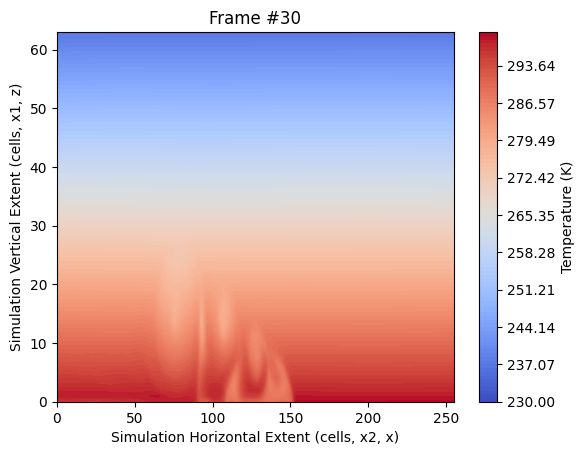

In [45]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Loop over the time saved frames 
for t in range(np.shape(data_temperature)[0]):

    # Ensures that the last plot will be cleared 
    clear_output(wait = True)

    # Make a countour plot with really fine layers to capture eddies
    plt.contourf(data_temperature[t,:,0,:], cmap = 'coolwarm', levels = np.linspace(230,300,100))
    plt.colorbar(label = 'Temperature (K)')
    title = 'Frame #' + str(t)
    plt.title(title)
    plt.xlabel('Simulation Horizontal Extent (cells, x2, x)')
    plt.ylabel('Simulation Vertical Extent (cells, x1, z)')
    plt.show()

    # Delay, so that it doesn't go too fast 
    time.sleep(0.1)

Now, lets actually look at the physical units 

In [46]:
# Array of time for each frame, in seconds
data_time = straka_output.variables['time'][:]

# Array of center of cells for vertical direction
data_x1 = straka_output.variables['x1'][:]

# Array of center of cells for horizontal direction
data_x2 = straka_output.variables['x2'][:]

# Create meshgrid in order to plot 
Z, X = np.meshgrid(data_x2, data_x1)

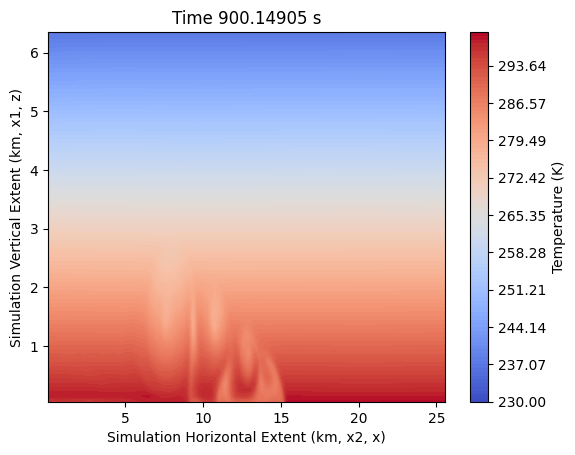

In [47]:
# Loop over the time saved frames 
for t in range(np.shape(data_temperature)[0]):

    # Ensures that the last plot will be cleared 
    clear_output(wait = True)

    # Make a countour plot with really fine layers to capture eddies
    plt.contourf(Z/1000,X/1000,data_temperature[t,:,0,:], cmap = 'coolwarm', levels = np.linspace(230,300,100))
    plt.colorbar(label = 'Temperature (K)')
    title = 'Time ' + str(data_time[t]) + ' s'
    plt.title(title)
    plt.xlabel('Simulation Horizontal Extent (km, x2, x)')
    plt.ylabel('Simulation Vertical Extent (km, x1, z)')
    plt.show()

    # Delay, so that it doesn't go too fast 
    time.sleep(0.1)

<div class="alert alert-block alert-success">

## $\texttt{PADDLE}$ Straka - Changing Input

Now that we are familiar with the above code, try changing the initial parameters!

Here, we have pre-made a bubble with the following properties: 

Same pressure and temperature for background bubble

p0 = 1e5 

Ts = 300 

Larger bubble placed near center of simulation

xc = 13e3 

xr = 6e3 

zc = 4e3

zr = 3e3 

A bit colder 

dT = -20

K = 75

</div>

In [ ]:
import netCDF4
import numpy as np

# Open the file
straka_output = netCDF4.Dataset('straka-changing-input.nc', 'r')

# Lets plot the temperature 
data_temperature = straka_output.variables['temp'][:]

import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Loop over the time saved frames 
for t in range(np.shape(data_temperature)[0]):

    # Ensures that the last plot will be cleared 
    clear_output(wait = True)

    # Make a countour plot with really fine layers to capture eddies
    plt.contourf(data_temperature[t,:,0,:], cmap = 'coolwarm', levels = np.linspace(230,300,100))
    plt.colorbar(label = 'Temperature (K)')
    title = 'Frame #' + str(t)
    plt.title(title)
    plt.xlabel('Simulation Horizontal Extent (cells, x2, x)')
    plt.ylabel('Simulation Vertical Extent (cells, x1, z)')
    plt.show()

    # Delay, so that it doesn't go too fast 
    time.sleep(0.1)